# Project 1- Exploratory Data Analysis on Brain Strokes

--------------------
**Introduction:** 

We accessed our dataset, brain_stroke from the Kaggle website. Strokes are a health condition which results from insufficiant blood flow to the brain which causes the brain to stop functioning properly. The main risk factor for strokes is high blood pressure. Other risk factors include high blood cholesterol, tobacco smoking, obesity, diabetes mellitus, a previous TIA, end-stage kidney disease, and atrial fibrillation. 

Reference: https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset?resource=download&select=brain_stroke.csv

Question: Does age or smoking status play a greater role in a person's chance of having a stroke?

The dataset is a csv file consisiting of 4981 rows and 11 columns

The data collected follows:

1) gender: "Male", "Female" or "Other"

2) age: age of the patient

3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

4) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

5) ever-married: "No" or "Yes"

6) worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed"

7) Residencetype: "Rural" or "Urban"

8) avgglucoselevel: average glucose level in blood

9) bmi: body mass index

10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

11) stroke: 1 if the patient had a stroke or 0 if not

In [ ]:
# Import packages
import pandas as pd # For handling data frames 
import numpy as np # For array calculations

# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Set the seed for generating random numbers
import random
np.random.seed(123)

# Statistical Simulation
from scipy import stats as st

Reading Data Files into Pandas

In [ ]:
# Read the CSV file into a data frame variable
from google.colab import drive
drive.mount('/content/drive')
stroke_df = pd.read_csv('/content/drive/MyDrive/brain_stroke.csv')

Mounted at /content/drive


In [ ]:
stroke_df.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type

---------------------------------
**Prepare and wrangle data with Pandas and Numpy**

In [ ]:
stroke_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

All of the variables appear to be the correct type

Check the dataset for NA's

In [ ]:
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

There are no NA's in the dataset.

Take a look at the data statistics

In [ ]:
stroke_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74
bmi,4981.0,28.498173,6.790464,14.00,23.70,28.10,32.60,48.90
stroke,4981.0,0.049789,0.217531,0.00,0.00,0.00,0.00,1.00


---------------------------------
**Use EDA principles and the Matplotlib / Seaborn packages to visualize the data.**

Explore the three quantitative variables: Age, bmi, and avergage glucose level.

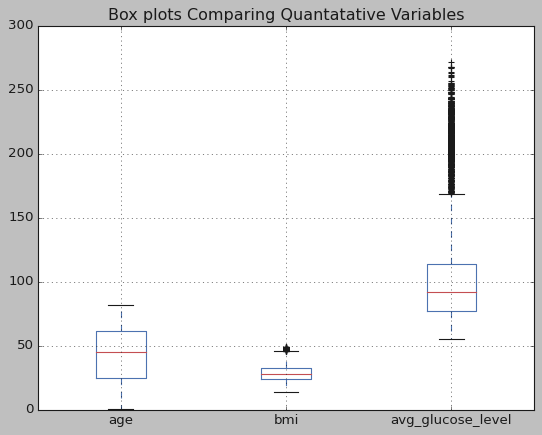

In [ ]:
bplots = stroke_df.boxplot(column = ['age', 'bmi', 'avg_glucose_level'])
bplots.plot()
plt.title("Box Plots Comparing Quantatative Variables")
plt.show()

<ipython-input-74-8db5ea31e41d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


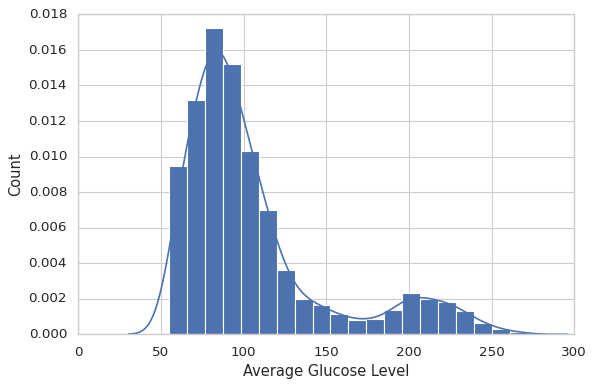

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    stroke_df['avg_glucose_level'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Average Glucose Level', ylabel='Count');

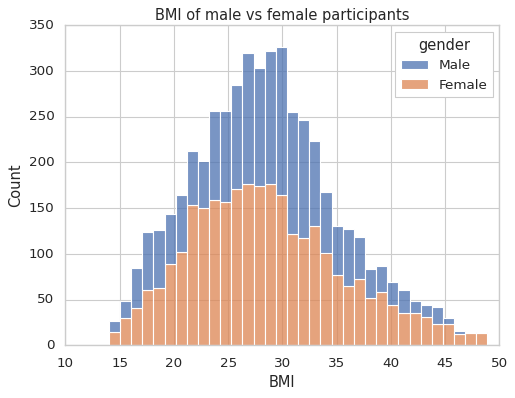

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data=stroke_df,x = 'bmi', hue="gender",multiple = 'stack')
sns.color_palette("flare", as_cmap=True) 
plt.title("BMI of male vs female participants")
plt.xlabel("BMI");

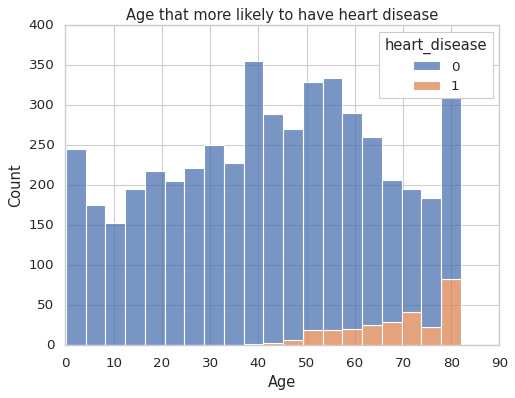

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data=stroke_df,x = 'age', hue="heart_disease",multiple = 'stack')
sns.color_palette("flare", as_cmap=True)
plt.title("Age that more likely to have heart disease")
plt.xlabel("Age");

---------------------------------
**Plot depending on question of interest**

Question: Does age or smoking status play a greater role in a person's chance of having a stroke?

Look at the statistics of the participants who had a stroke (stroke = 1) and who smoke (smoking_status = 'smokes').

In [ ]:
hadStroke = stroke_df.groupby('stroke').get_group(1)
hadStroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.0
mean,67.819839,0.266129,0.189516,132.175565,30.186694,1.0
std,12.670565,0.442826,0.392711,61.771083,5.658245,0.0
min,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,59.000000,0.000000,0.000000,79.572500,26.975000,1.0
50%,71.000000,0.000000,0.000000,105.040000,29.450000,1.0
75%,78.000000,1.000000,0.000000,195.960000,32.650000,1.0
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.0


In [ ]:
smoked = stroke_df.groupby('smoking_status').get_group('smokes')
smoked.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,47.159794,0.117268,0.078608,107.818724,30.089948,0.054124
std,16.462986,0.321947,0.269300,47.310897,6.093226,0.226408
min,10.000000,0.000000,0.000000,55.320000,15.700000,0.000000
25%,33.000000,0.000000,0.000000,77.072500,25.600000,0.000000
50%,47.000000,0.000000,0.000000,93.590000,29.300000,0.000000
75%,59.000000,0.000000,0.000000,114.332500,33.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.400000,1.000000


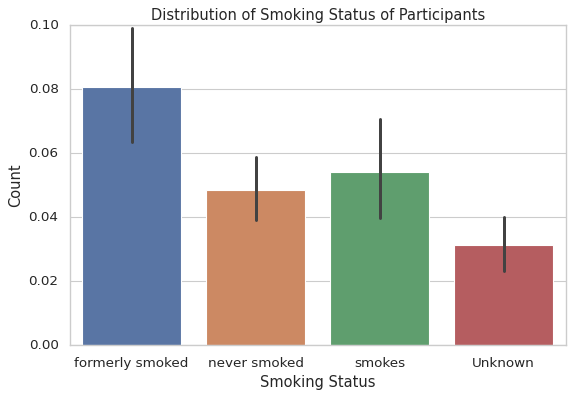

In [ ]:
sns.barplot(x="smoking_status", y='stroke', data=stroke_df)
#label axis
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.title("Distribution of Smoking Status of Participants");

In [ ]:
pd.crosstab(stroke_df.smoking_status,stroke_df.stroke,margins=True)

stroke,0,1,All
smoking_status,,,
Unknown,1453,47,1500
formerly smoked,797,70,867
never smoked,1749,89,1838
smokes,734,42,776
All,4733,248,4981


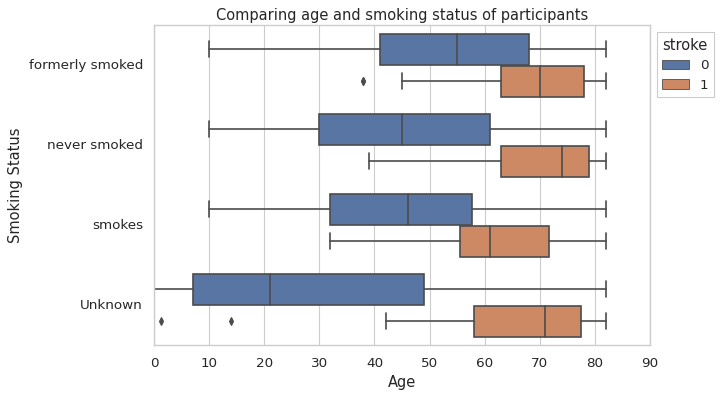

In [ ]:
ax = sns.boxplot(data=stroke_df, x= 'age', y='smoking_status', hue='stroke')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Age")
plt.ylabel("Smoking Status")
plt.title("Comparing age and smoking status of participants");

---------------------------------
**Inference of the Median for the quantitative variable age**

Bootstrapping mean age of patients who had a stroke (hadStroke) with a 95% confidence interval

In [ ]:
# Draw some random sample with replacement and append median to median_ages.
sample_size = int(0.10*len(stroke_df))
median_ages, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(hadStroke['age'], replace=True, size=sample_size)
    sample_median = np.median(temp_sample)
    median_ages.append(sample_median)
    
# Calculate bootstrapped mean and 95% confidence interval.
boot_median = np.mean(median_ages)
boot_95_ci = np.percentile(median_ages, [2.5, 97.5])
print("Bootstrapped Median Age = {}, 95% CI = {}".format(boot_median, boot_95_ci))

Bootstrapped Median Age = 71.0615, 95% CI = [69. 73.]
